In [1]:
from __future__ import division, print_function
import sys, os, glob, gc, warnings
import numpy as np
from astropy.table import Table, vstack, hstack
import fitsio
import matplotlib.pyplot as plt

import healpy as hp

from desiutil.plots import init_sky, plot_sky_binned

In [2]:
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'figure.facecolor':'w'} 
plt.rcParams.update(params)

plt.rcParams['image.cmap'] = 'seismic'

In [3]:
nside = 64

In [4]:
field = 'south'
dr8_south = Table.read('/Users/rongpu/Documents/Data/desi_misc/sky_residuals/sky_residual_dr8_{}_{}.txt'.format(field, nside), format='ascii.commented_header')
dr9_south = Table.read('/Users/rongpu/Documents/Data/desi_misc/sky_residuals/sky_residual_dr9_{}_{}.fits'.format(field, nside))

field = 'north'
dr8_north = Table.read('/Users/rongpu/Documents/Data/desi_misc/sky_residuals/sky_residual_dr8_{}_{}.txt'.format(field, nside), format='ascii.commented_header')
dr9_north = Table.read('/Users/rongpu/Documents/Data/desi_misc/sky_residuals/sky_residual_dr9_{}_{}.fits'.format(field, nside))

16998
12749
6120
6116


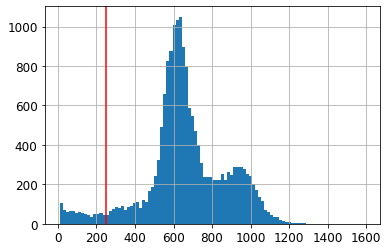

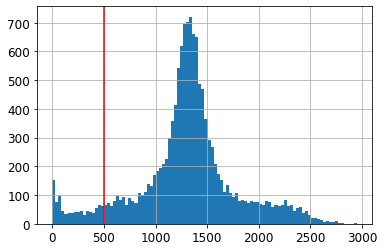

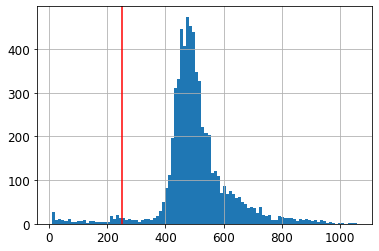

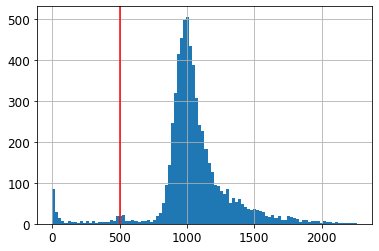

In [5]:
min_count_dr8 = 250
min_count_dr9 = 500
dr8_south_mask = dr8_south['count']>min_count_dr8
dr9_south_mask = dr9_south['count']>min_count_dr9
dr8_north_mask = dr8_north['count']>min_count_dr8
dr9_north_mask = dr9_north['count']>min_count_dr9
print(np.sum(dr8_south_mask))
print(np.sum(dr9_south_mask))
print(np.sum(dr8_north_mask))
print(np.sum(dr9_north_mask))

plt.hist(dr8_south['count'], 100)
plt.axvline(min_count_dr8, color='r')
plt.grid()
plt.show()

plt.hist(dr9_south['count'], 100)
plt.axvline(min_count_dr9, color='r')
plt.grid()
plt.show()

plt.hist(dr8_north['count'], 100)
plt.axvline(min_count_dr8, color='r')
plt.grid()
plt.show()

plt.hist(dr9_north['count'], 100)
plt.axvline(min_count_dr9, color='r')
plt.grid()
plt.show()

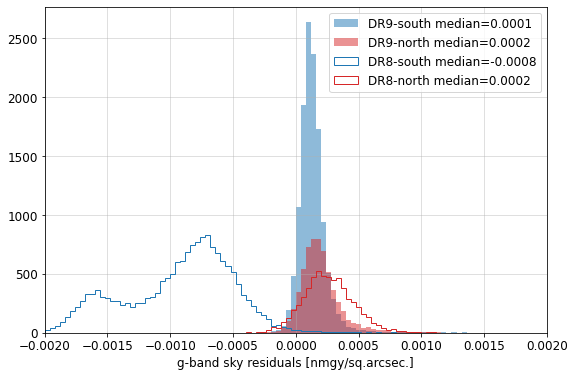

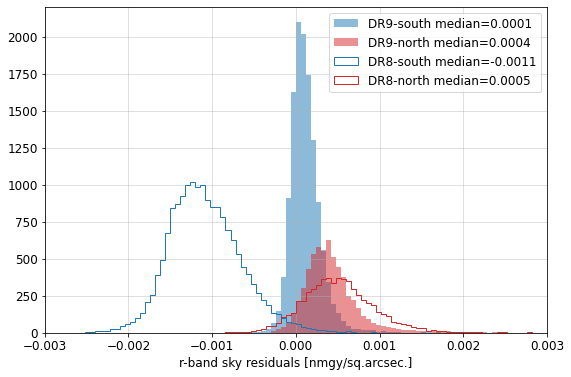

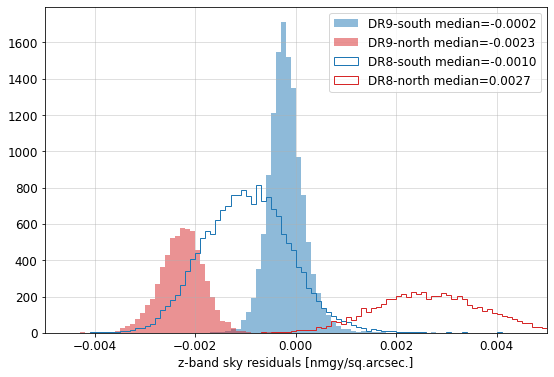

In [7]:
col_list = ['count', 'g_sky', 'r_sky', 'z_sky']
vrange_list = [None, 0.002, 0.003, 0.005]

for col, vrange in zip(col_list, vrange_list):
    if col=='count':
        continue
    plt.figure(figsize=(9, 6))
    v = dr9_south[col][dr9_south_mask]
    plt.hist(v, 100, range=(-vrange, vrange), color='C0', alpha=0.5, label='DR9-south median={:.4f}'.format(np.median(v)), density=False)
    v = dr9_north[col][dr9_north_mask]
    plt.hist(v, 100, range=(-vrange, vrange), color='C3', alpha=0.5, label='DR9-north median={:.4f}'.format(np.median(v)), density=False)
    v = dr8_south[col][dr8_south_mask]
    plt.hist(v, 100, range=(-vrange, vrange), color='C0', histtype='step', alpha=1, label='DR8-south median={:.4f}'.format(np.median(v)), density=False)
    v = dr8_north[col][dr8_north_mask]
    plt.hist(v, 100, range=(-vrange, vrange), color='C3', histtype='step', alpha=1, label='DR8-north median={:.4f}'.format(np.median(v)), density=False)
    plt.xlim(-vrange, vrange)
    plt.xlabel('{}-band sky residuals [nmgy/sq.arcsec.]'.format(col[:col.find('sky')-1]))
    plt.grid(alpha=0.5)
    plt.legend(loc='best')
    plt.show()

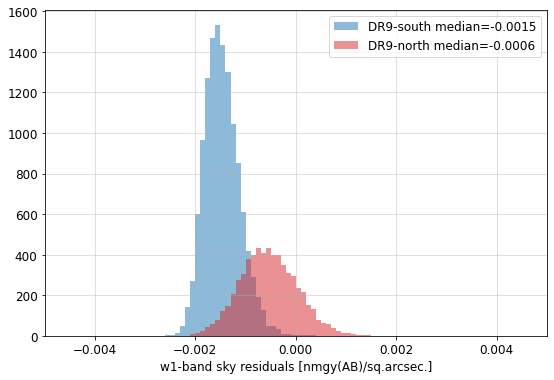

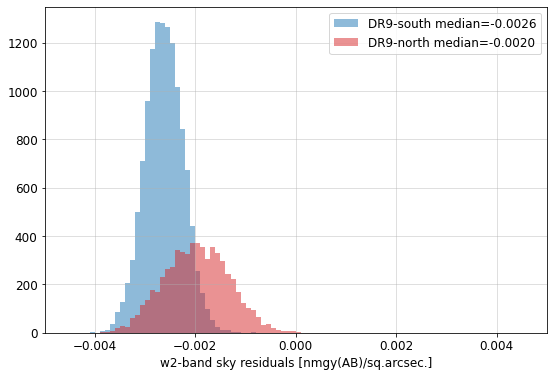

In [9]:
col_list = ['w1_sky_9_11', 'w2_sky_9_11']
vrange_list = [0.005, 0.005]

for col, vrange in zip(col_list, vrange_list):
    if col=='count':
        continue
    plt.figure(figsize=(9, 6))
    v = dr9_south[col][dr9_south_mask]
    plt.hist(v, 100, range=(-vrange, vrange), color='C0', alpha=0.5, label='DR9-south median={:.4f}'.format(np.median(v)), density=False)
    v = dr9_north[col][dr9_north_mask]
    plt.hist(v, 100, range=(-vrange, vrange), color='C3', alpha=0.5, label='DR9-north median={:.4f}'.format(np.median(v)), density=False)
    plt.xlim(-vrange, vrange)
    plt.xlabel('{}-band sky residuals [nmgy(AB)/sq.arcsec.]'.format(col[:col.find('sky')-1]))
    plt.grid(alpha=0.5)
    plt.legend(loc='best')
    plt.show()

In [10]:
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'figure.facecolor':'w'} 
plt.rcParams.update(params)

plt.rcParams['image.cmap'] = 'seismic'

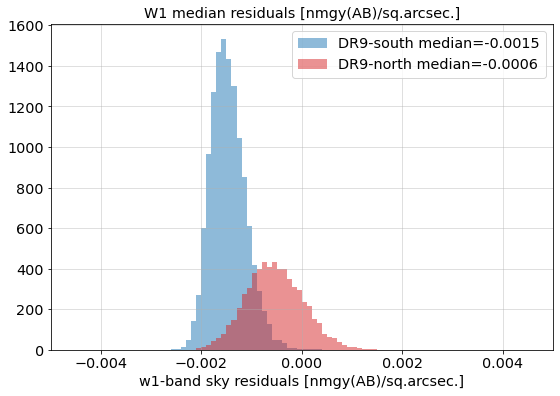

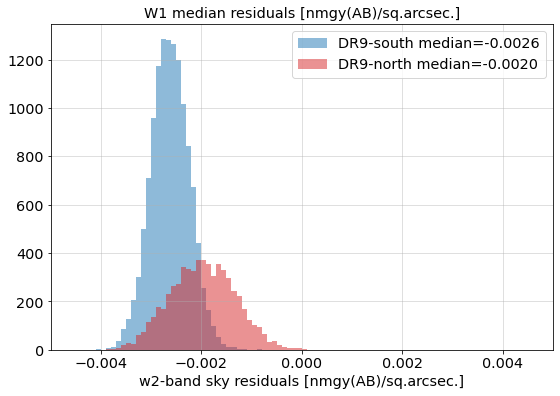

In [12]:
col_list = ['w1_sky_9_11', 'w2_sky_9_11']
vrange_list = [0.005, 0.005]

for col, vrange in zip(col_list, vrange_list):
    if col=='count':
        continue
    plt.figure(figsize=(9, 6))
    v = dr9_south[col][dr9_south_mask]
    plt.hist(v, 100, range=(-vrange, vrange), color='C0', alpha=0.5, label='DR9-south median={:.4f}'.format(np.median(v)), density=False)
    v = dr9_north[col][dr9_north_mask]
    plt.hist(v, 100, range=(-vrange, vrange), color='C3', alpha=0.5, label='DR9-north median={:.4f}'.format(np.median(v)), density=False)
    plt.xlim(-vrange, vrange)
    plt.xlabel('{}-band sky residuals [nmgy(AB)/sq.arcsec.]'.format(col[:col.find('sky')-1]))
    plt.grid(alpha=0.5)
    plt.legend(loc='best')
    plt.show()